In [105]:
#1.1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_cars = pd.read_csv('./cars.csv', engine='python')

df_cars


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [143]:
#1.2
df_cars_types = df_cars.dtypes

df_cars_types


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [144]:
#1.3

df_cars_nulls = df_cars.isna().sum()

df_cars_nulls



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [145]:
#2

df_splited_cars = df_cars

df_splited_cars['company'] = df_cars['CarName'].apply(lambda x: x.split()[0])

df_splited_cars


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [146]:
#2.1

df_splited_cars_without_CarName = df_splited_cars.drop('CarName', axis=1)

df_splited_cars_without = df_splited_cars_without_CarName.drop('car_ID', axis=1)

df_splited_cars_without

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [147]:
#2.2

df_company_nunique = df_splited_cars_without['company'].nunique()

df_company_nunique

df_company_unique = df_splited_cars_without['company'].unique()

df_company_unique

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [148]:
#3.1

df_splited_cars_without['company'] = df_splited_cars_without['company'].replace({
    "maxda" : "mazda",
    "Nissan" : "nissan",
    "porcshce" : "porsche",
    "toyouta" : "toyota",
    "vokswagen" : "volkswagen",
    "vw" : "volkswagen"
})

df_cars_no_mistakes = df_splited_cars_without['company'].nunique()

df_cars_no_mistakes



22

In [149]:
#4.1

df_cars_predictors = df_splited_cars_without[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

df_cars_predictors

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


In [150]:
#4.2

df_cars_num_columns = df_cars_predictors[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]

df_correlation_cars = df_cars_num_columns.corr()

df_correlation_cars

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


In [151]:
#4.3

df_cars_num_columns = df_cars_predictors[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]

correlation_matrix = df_cars_num_columns.corr()

df_cars_correlation_price_horsepower = correlation_matrix.at['price', 'horsepower']

df_cars_correlation_price_horsepower.round(2)

np.float64(0.81)

In [152]:
#5.1

df_cars_objects_regression = df_splited_cars_without[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'enginelocation']]

df_cars_dummies_columns = pd.get_dummies(data=df_splited_cars_without[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'enginelocation']], drop_first=True)


In [153]:
#5.2

df_cars_objects_regression_dummies = pd.get_dummies(df_cars_objects_regression, drop_first=True)

df_cars_objects_regression_dummies


,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,company_volvo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
201,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,True,False
202,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
203,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False


In [154]:
#5.3

df_cars_all_regression_dummies = pd.get_dummies(df_splited_cars, drop_first=True)

df_cars_all_regression_dummies

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,False,True,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,False,True,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,False,True,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,False,False,False,True,False


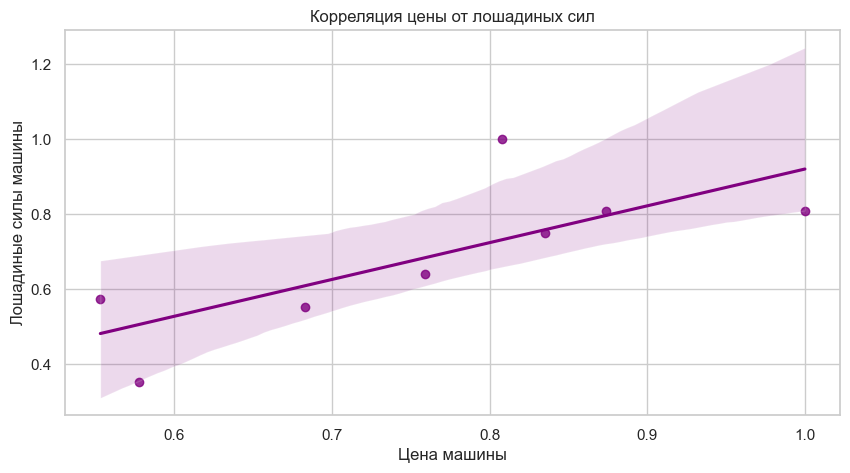

Процент изменчивости R^2: 0.5602096278862232


In [155]:
#6

sns.set(style='whitegrid', rc={'figure.figsize': (10, 5)})
sns.regplot(x='price', y='horsepower', color="purple", data=df_correlation_cars)
plt.title('Корреляция цены от лошадиных сил')
plt.xlabel('Цена машины')
plt.ylabel('Лошадиные силы машины')
plt.show()

X = df_correlation_cars[['price']] 
y = df_correlation_cars['horsepower'] 

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print(f'Процент изменчивости R^2: {r2}')

In [ ]:
df_cars_predictors

print(df_cars_predictors.dtypes)

for col in ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']:
    df_cars_predictors[col] = pd.to_numeric(df_cars_predictors[col], errors='coerce')

print(df_cars_predictors.isnull().sum())

df_cars_predictors = df_cars_predictors.dropna()

print(df_cars_predictors.dtypes)

# Подготовка данных для модели
Y = df_cars_predictors['price']
X = df_cars_predictors[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower']]

# Преобразование категориальных переменных в числовые
X = pd.get_dummies(X, drop_first=True)

# Проверка типов данных после преобразования категориальных переменных
print(X.dtypes)

# Добавление константы
X = sm.add_constant(X)

# Проверка типов данных после добавления константы
print(X.dtypes)

# Создание и обучение модели
model = sm.OLS(Y, X)
results = model.fit()

# Вывод результатов
print(results.summary())


,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0
